In [1]:
basedir = '/home/abhinavgupta0110/NeuralODEs_ROM_Closure'

import os

is_google_colab = False
is_use_GPU = False

### Mount the drive

In [2]:
if is_use_GPU:
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
        print('No GPU found!')
    else:
        print(gpu_info)

if is_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

    %pip install quadpy
    
os.chdir(os.path.join(basedir, 'neuralClosureModels'))

### Load modules

In [3]:
import time
import sys
from IPython.core.debugger import set_trace

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from shutil import move
import pickle
import scipy as sc
from scipy import signal

tf.keras.backend.set_floatx('float32')
import logging
tf.get_logger().setLevel(logging.ERROR)

## Load data

In [4]:
os.chdir(basedir)
    
with open(os.path.join('neuralClosureModels/final_paper_scripts', 'nDistDDE_C10_Exp1_predictions.pkl'), 'rb') as output:
    nDistDDE_dict_l1 = pickle.load(output)
    
with open(os.path.join('neuralClosureModels/final_paper_scripts', 'nDistDDE_C11_Exp1_predictions.pkl'), 'rb') as output:
    nDistDDE_dict_l2 = pickle.load(output)
    
with open(os.path.join('neuralClosureModels/final_paper_scripts', 'nDistDDE_C12_Exp1_predictions.pkl'), 'rb') as output:
    nDistDDE_dict_l3 = pickle.load(output)
    
with open(os.path.join('neuralClosureModels/final_paper_scripts', 'nDistDDE_C13_Exp1_predictions.pkl'), 'rb') as output:
    nDistDDE_dict_l4 = pickle.load(output)
    
with open(os.path.join('neuralClosureModels/final_paper_scripts', 'nDistDDE_C9_Exp1_predictions.pkl'), 'rb') as output:
    nDistDDE_dict_base = pickle.load(output)

## Plot RMSE 

In [5]:
t = tf.concat([nDistDDE_dict_base['t'], nDistDDE_dict_base['val_t']], axis=0)

true_ai = tf.concat([nDistDDE_dict_base['true_ai_red'], nDistDDE_dict_base['val_true_ai_red']], axis=0)

ai = tf.concat([nDistDDE_dict_base['ai'], nDistDDE_dict_base['val_ai']], axis=0)

nDistDDE_pred_base = nDistDDE_dict_base['pred_y']
nDistDDE_pred_l1 = nDistDDE_dict_l1['pred_y']
nDistDDE_pred_l2 = nDistDDE_dict_l2['pred_y']
nDistDDE_pred_l3 = nDistDDE_dict_l3['pred_y']
nDistDDE_pred_l4 = nDistDDE_dict_l4['pred_y']

In [6]:
POD_GP_error = tf.squeeze(tf.sqrt(tf.reduce_mean(tf.math.squared_difference(true_ai, ai), axis=-1)), axis=-1)
nDistDDE_error_base = tf.squeeze(tf.sqrt(tf.reduce_mean(tf.math.squared_difference(true_ai, nDistDDE_pred_base), axis=-1)), axis=-1)
nDistDDE_error_l1 = tf.squeeze(tf.sqrt(tf.reduce_mean(tf.math.squared_difference(true_ai, nDistDDE_pred_l1), axis=-1)), axis=-1)
nDistDDE_error_l2 = tf.squeeze(tf.sqrt(tf.reduce_mean(tf.math.squared_difference(true_ai, nDistDDE_pred_l2), axis=-1)), axis=-1)
nDistDDE_error_l3 = tf.squeeze(tf.sqrt(tf.reduce_mean(tf.math.squared_difference(true_ai, nDistDDE_pred_l3), axis=-1)), axis=-1)
nDistDDE_error_l4 = tf.squeeze(tf.sqrt(tf.reduce_mean(tf.math.squared_difference(true_ai, nDistDDE_pred_l4), axis=-1)), axis=-1)

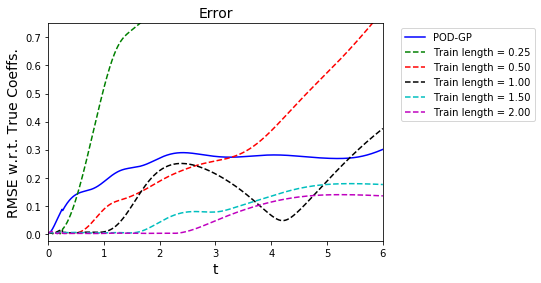

In [10]:
diff_colors = ['b', 'g', 'r', 'k', 'c', 'm']
rom_dims = 3

fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = fig.add_subplot(111)

ax.cla()
ax.set_title('Error', fontsize=14)
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel('RMSE w.r.t. True Coeffs.', fontsize=14)
ax.set_xlim(min(t.numpy()), max(t.numpy()))
ax.set_ylim(-0.025, 0.75)

ax.plot(t.numpy(), POD_GP_error.numpy(), 'b'+'-', label = 'POD-GP ')
ax.plot(t.numpy(), nDistDDE_error_l1.numpy(), 'g'+'--', label = 'Train length = 0.25')
ax.plot(t.numpy(), nDistDDE_error_l2.numpy(), 'r'+'--', label = 'Train length = 0.50')
ax.plot(t.numpy(), nDistDDE_error_l3.numpy(), 'k'+'--', label = 'Train length = 1.00')
ax.plot(t.numpy(), nDistDDE_error_l4.numpy(), 'c'+'--', label = 'Train length = 1.50')
ax.plot(t.numpy(), nDistDDE_error_base.numpy(), 'm'+'--', label = 'Train length = 2.00')

ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show() 

In [8]:
nDistDDE_pred_base.shape

TensorShape([598, 1, 3])